In [1]:
# import libraries and data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
data = pd.read_csv('cookie_cats.csv')

In [2]:
# add mock marketing channels to build more visualizations and showcase my skills
np.random.seed(274352)
marketing_channel_code = pd.Series(np.random.randint(1, 6, data.shape[0]))
marketing_channel_dict = {1: "Facebook", 
                          2: "Instagram", 
                          3: "Push", 
                          4: "Google", 
                          5: "Email"}
data['marketing_channel'] = marketing_channel_code.map(marketing_channel_dict)

In [3]:
# add mock subscription date to build more visualizations and showcase my skills
data['subscribed'] = np.random.randint(1, 16, data.shape[0])
data['subscribed'] = data.apply(lambda x: '2023-11-' + str(x['subscribed']) \
                                if len(str(x['subscribed'])) == 2 \
                                else '2023-11-0' + str(x['subscribed']), axis=1)
data['subscribed'] = pd.to_datetime(data['subscribed'], format='%Y-%m-%d')
# we will count retention_1 column as subscription
data.rename(columns={'retention_1':'converted'}, inplace=True)
data.head()

,userid,version,sum_gamerounds,converted,retention_7,marketing_channel,subscribed
0,116,gate_30,3,False,False,Email,2023-11-13
1,337,gate_30,38,True,False,Instagram,2023-11-02
2,377,gate_40,165,True,False,Google,2023-11-01
3,483,gate_40,1,False,False,Push,2023-11-02
4,488,gate_40,179,True,True,Facebook,2023-11-08


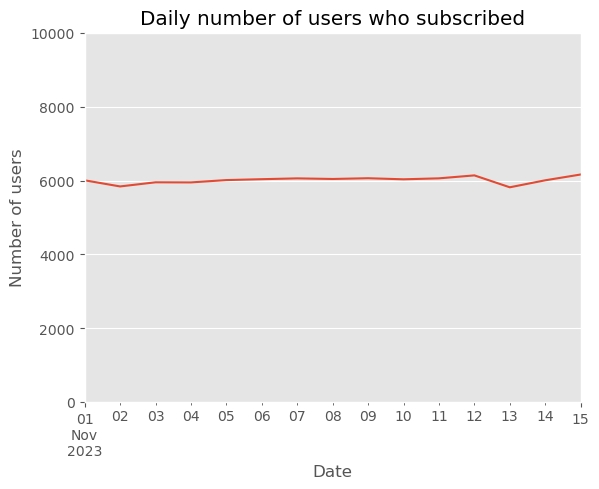

In [4]:
# aggregate unique users that subscribed by date
daily_users = data.groupby('subscribed')['userid'].nunique()
# plot
daily_users.plot()
# annotate 
plt.title('Daily number of users who subscribed')
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.ylim(0, 10000)
plt.show()

In [5]:
#split data by game version
gate_30_data = data[data['version'] == 'gate_30']
gate_40_data = data[data['version'] == 'gate_40']

In [6]:
# calculate conversion rate for both versions
gate_30_converted = gate_30_data[gate_30_data['converted'] == True]['userid'].nunique()
gate_40_converted = gate_40_data[gate_40_data['converted'] == True]['userid'].nunique()

gate_30_total = gate_30_data['userid'].nunique()
gate_40_total = gate_40_data['userid'].nunique()

print(f"Conversion rate for version gate_30 is {round(gate_30_converted / gate_30_total * 100, 2)}%")
print(f"Conversion rate for version gate_40 is {round(gate_40_converted / gate_40_total * 100, 2)}%")

Conversion rate for version gate_30 is 44.82%
Conversion rate for version gate_40 is 44.23%


In [7]:
# calculate retention rate for both versions
gate_30_retained = gate_30_data[gate_30_data['retention_7'] == True]['userid'].nunique()
gate_40_retained = gate_40_data[gate_40_data['retention_7'] == True]['userid'].nunique()

print(f"Retention rate for version gate_30 is {round(gate_30_retained / gate_30_converted * 100, 2)}%")
print(f"Retention rate for version gate_40 is {round(gate_40_retained / gate_40_converted * 100, 2)}%")

Retention rate for version gate_30 is 42.44%
Retention rate for version gate_40 is 41.15%


In [8]:
# calculate conversion and retention rates for every marketing channel
gate_30_converted_channel = gate_30_data[gate_30_data['converted'] == True].groupby(['marketing_channel'])['userid'].nunique()
gate_40_converted_channel = gate_40_data[gate_40_data['converted'] == True].groupby(['marketing_channel'])['userid'].nunique()

gate_30_retained_channel = gate_30_data[gate_30_data['retention_7'] == True].groupby(['marketing_channel'])['userid'].nunique()
gate_40_retained_channel = gate_40_data[gate_40_data['retention_7'] == True].groupby(['marketing_channel'])['userid'].nunique()

print(f"Retention rate for version gate_30 by {round(gate_30_retained_channel / gate_30_converted_channel * 100, 2)}")
print(f"Retention rate for version gate_40 by {round(gate_40_retained_channel / gate_40_converted_channel * 100, 2)}")

Retention rate for version gate_30 by marketing_channel
Email        42.17
Facebook     41.71
Google       43.00
Instagram    42.31
Push         43.01
Name: userid, dtype: float64
Retention rate for version gate_40 by marketing_channel
Email        39.93
Facebook     42.29
Google       40.99
Instagram    40.92
Push         41.60
Name: userid, dtype: float64


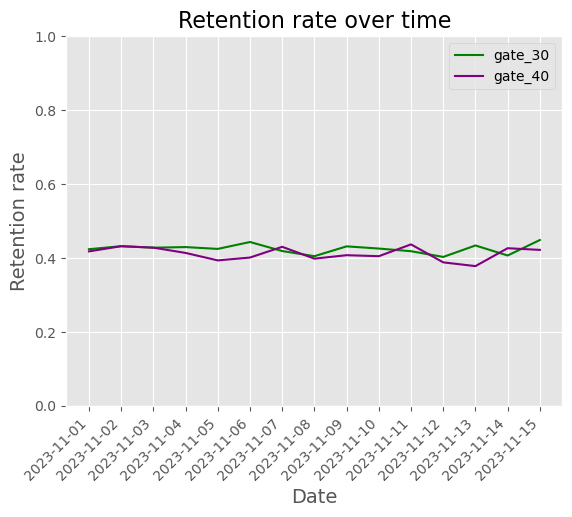

In [9]:
# daily retention over time
total_gate_30_by_date = gate_30_data[gate_30_data['converted'] == True].groupby(['subscribed'])['userid'].nunique()
total_gate_40_by_date = gate_40_data[gate_40_data['converted'] == True].groupby(['subscribed'])['userid'].nunique()

retained_gate_30_by_date = gate_30_data[gate_30_data['retention_7'] == True].groupby(['subscribed'])['userid'].nunique()
retained_gate_40_by_date = gate_40_data[gate_40_data['retention_7'] == True].groupby(['subscribed'])['userid'].nunique()

daily_retention_rate_gate_30 = retained_gate_30_by_date / total_gate_30_by_date
daily_retention_rate_gate_40 = retained_gate_40_by_date / total_gate_40_by_date

# turn series to dataframes and reset index; then merge dataframes
daily_retention_rate_gate_30 = pd.DataFrame(daily_retention_rate_gate_30.reset_index())
daily_retention_rate_gate_30.columns = ['date_subscribed', 'retention_rate_gate_30']

daily_retention_rate_gate_40 = pd.DataFrame(daily_retention_rate_gate_40.reset_index())
daily_retention_rate_gate_40.columns = ['date_subscribed', 'retention_rate_gate_40']
daily_retention_rate = pd.merge(daily_retention_rate_gate_30,
                                daily_retention_rate_gate_40,
                                how="inner",
                                on='date_subscribed')

#plot individual lines with custom colors and styles
plt.plot(daily_retention_rate['retention_rate_gate_30'], label='gate_30', color='green')
plt.plot(daily_retention_rate['retention_rate_gate_40'], label='gate_40', color='purple')

#add legend
plt.legend()

#add axis labels and a title
plt.xticks(daily_retention_rate.index, [str(x)[:10] for x in daily_retention_rate['date_subscribed'].values])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Retention rate', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.title('Retention rate over time', fontsize=16)
plt.ylim(0, 1)

#display plot
plt.show()

In [10]:
#grouping by channels and subscription date
channels_by_dates_game_30 = gate_30_data.groupby(['subscribed', 'marketing_channel'])['userid'].count()
channels_by_dates_game_40 = gate_40_data.groupby(['subscribed', 'marketing_channel'])['userid'].count()

# unstack data after grouping
channels_by_dates_game_30 = pd.DataFrame(channels_by_dates_game_30.unstack(level=1))
channels_by_dates_game_40 = pd.DataFrame(channels_by_dates_game_40.unstack(level=1))

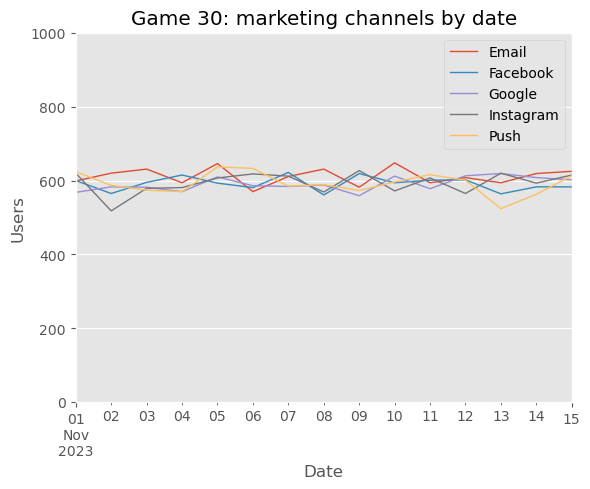

In [11]:
# plot game 30 marketing channels data
channels_by_dates_game_30.plot(lw=1)
plt.title('Game 30: marketing channels by date')
plt.xlabel('Date')
plt.ylabel('Users')
plt.legend(loc= 'upper right', labels=channels_by_dates_game_30.columns.values)
plt.ylim(0,1000)
plt.show()

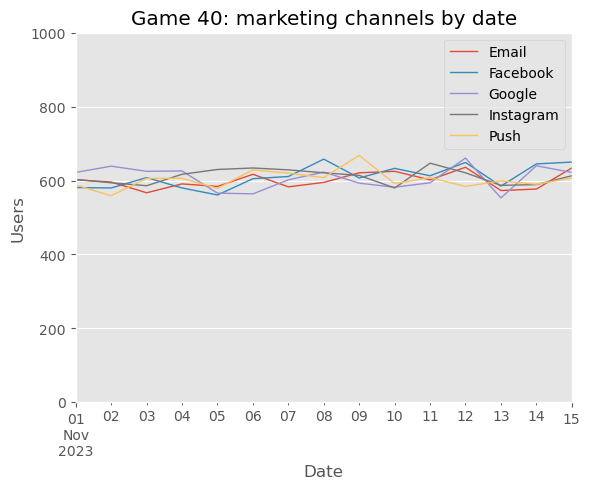

In [12]:
# plot game 40 marketing channels data
channels_by_dates_game_40.plot(lw=1)
plt.title('Game 40: marketing channels by date')
plt.xlabel('Date')
plt.ylabel('Users')
plt.legend(loc= 'upper right', labels=channels_by_dates_game_40.columns.values)
plt.ylim(0,1000)
plt.show()